

# Case Study - Multiple testing

## Getting started


This unit is organized into the following sections:

1. Data Processing
2. Data Summary
3. Investigative Visualization
4. Hypothesis testing


In [1]:
import os
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 10
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## Import the Data

Before we jump into the data it can be useful to give a little background so that you can better understand the features.  Since the dawn of statistics practitioners have been trying to find advantages when it comes to games.  Much of this was motivated by gambling---here we will look at the results from this tournament in a different way.  We are going to ask the simple question

  >Was the tournament setup in a fair way?

Of course the findings from an investigation centering around this question could be used to strategically place bets, but lets assume that we are simply interested in whether or not the tournament organizers did an adequate job.  The reason for doing this is to prepare for the AAVAIL data that is coming.  This exercise is an important reminder that you do not have to wait until the day that data arrive to start your work. 

There are 32 teams, each representing a single country, that compete in groups or pools then the best teams from those groups compete in a single elimination tournament to see who will become world champions.  This is by far the world's most popular sport so one would hope that the governing organization FIFA did a good job composing the pools.  If for example there are 8 highly ranked teams then each of those teams should be in a different pool. 

In our data set we have more than just rank so we can dig in a little deeper than that, but first let's have a look at the data.

In [3]:
DATA_DIR = os.path.join("D:\\ne-govno\\Multiple-Testing-Case-Study-Local","data")
df = pd.read_csv(os.path.join(DATA_DIR, 'worldcup-2018.csv'))
df.columns = [re.sub("\s+","_",col.lower()) for col in df.columns]
df.head()

,team,group,previous_appearances,previous_titles,previous_finals,previous_semifinals,current_fifa_rank,first_match_against,match_index,history_with_first_opponent_w-l,history_with_first_opponent_goals,second_match_against,match_index.1,history_with_second_opponent_w-l,history_with_second_opponent_goals,third_match_against,match_index.2,history_with_third_opponent_w-l,history_with_third_opponent_goals,unnamed:_19
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0,NaN
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0,NaN
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0,NaN
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0,NaN
4,Porugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0,NaN


To limit the dataset for educational purposes we create a new data frame that consists of only the following columns: 

* team
* group
* previous_appearances
* previous_titles
* previous_finals
* previous_semifinals
* current_fifa_rank

## Data Processing

### QUESTION 1

Using the column names below create a new dataframe that uses only them.

In [4]:
columns = ['team', 'group','previous_appearances','previous_titles','previous_finals',
           'previous_semifinals','current_fifa_rank']


df = df[columns]

To help with this analysis we are going to engineer a feature that combines all of the data in the table.  This feature represents the past performance of a team.  Given the data we have it is the best proxy on hand for how good a team will perfom.  Feel free to change the multiplers, but let's just say that `past_performance` will be a linear combination of the related features we have.

Let $X_{1}$,...,$X_{4}$ be `previous_titles`,`previous_finals`,`previous_semifinals`,`previous_appearances` and let the corresponding vector $\mathbf{\alpha}$ be the multipliers.  This will give us,

$$
\textrm{past_performance} = \alpha_{1} X_{1} + \alpha_{2} X_{2} + \alpha_{3} X_{3} + \alpha_{4} X_{4}
$$

Modify $\mathbf{\alpha}$ if you wish.  Then add to your dataframe the new feature `past_performance`.

### QUESTION 2

create the engineered feature as a new column

In [5]:
alpha = np.array([16,8,4,1])

df['past_perfomance'] = alpha[0]*df['previous_titles']+alpha[1]*df['previous_finals']+alpha[2]*df['previous_semifinals']+alpha[3]*df['previous_appearances']



## Data Summary

### QUESTION 3

Using your choice of tools create one or more **tabular summaries** of the data

In [9]:


df.groupby('team', as_index = False).agg({'past_perfomance':'mean', 'current_fifa_rank':'mean'})\
  .sort_values('current_fifa_rank',ascending = False)


,team,past_perfomance,current_fifa_rank
23,Russia,14.0,65.0
24,Saudi Arabia,4.0,63.0
15,Korea,13.0,59.0
19,Panama,0.0,56.0
14,Japan,5.0,55.0
18,Nigeria,5.0,50.0
17,Morocco,4.0,40.0
1,Australia,4.0,39.0
26,Serbia,19.0,37.0
12,IRAN,4.0,32.0


In [11]:
df.groupby('group', as_index = False).agg({'past_perfomance':'mean', 'current_fifa_rank':'mean'})\
  .sort_values('current_fifa_rank',ascending = False)

,group,past_perfomance,current_fifa_rank
0,A,25.00,45.00
6,G,16.50,25.75
7,H,6.50,24.50
5,F,65.25,23.50
3,D,30.25,23.25
1,B,17.00,20.25
4,E,58.25,18.25
2,C,19.50,17.75


### QUESTION 4

Check for missing data. Write code to identify if there is any missing data.

In [10]:
df.isnull().any()


team                    False
group                   False
previous_appearances    False
previous_titles         False
previous_finals         False
previous_semifinals     False
current_fifa_rank       False
past_perfomance         False
dtype: bool

## Investigative Visualization

### QUESTION 5

Come up with one or more plots that investigate the central question... Are the groups comprised in a fair way?

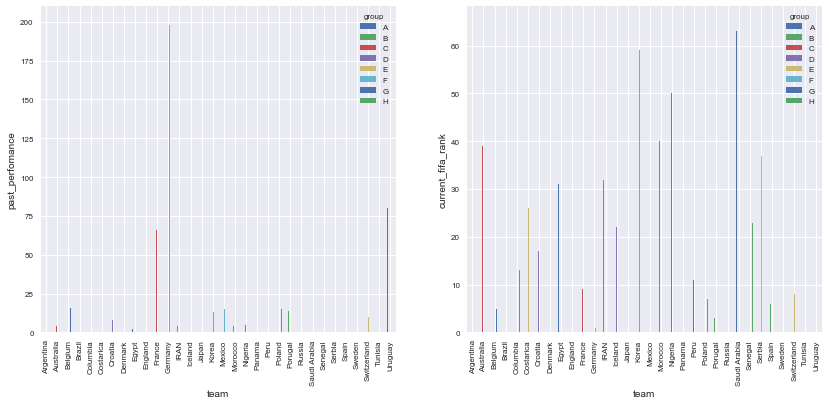

In [17]:


fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

table1 = pd.pivot_table(df, index='team', columns = 'group', values="past_perfomance")
table2 = pd.pivot_table(df, index='team', columns = 'group', values="current_fifa_rank")

table1.plot(kind='bar', ax=ax1)
ax1.set_ylabel("past_perfomance");

table2.plot(kind='bar', ax=ax2)
ax2.set_ylabel("current_fifa_rank");


array([<AxesSubplot:title={'center':'past_perfomance'}, xlabel='group'>,
       <AxesSubplot:title={'center':'current_fifa_rank'}, xlabel='group'>],
      dtype=object)

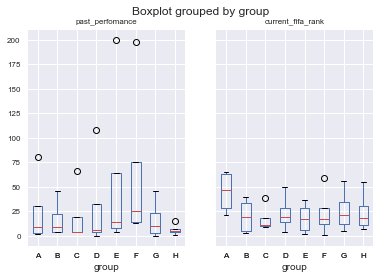

In [18]:
df.boxplot(column = ["past_perfomance", "current_fifa_rank"], by = 'group')

## Hypothesis Testing

There are a number of ways to use hypothesis testing in this situation.  There are certainly reasonable hypotheses tests and other methods like simulation approaches, that we have not discussed, but they would be appropriate here.  If you choose to explore some of the methods that are outside the scope of this course then we encourage you to first try the simple approach proposed here and compare the results to any further additional approaches you choose to use.

We could use an ANOVA approach here that would signify a difference between groups, but we would not know which and how many teams were different.  As we stated before there are a number of ways to approach the investigation, but lets use a simple approach.  We are going to setup our investigation to look at all pairwise comparisons to provide as much insight as possible.

Recall that there are $\frac{(N-1)(N)}{2}$ pairwise comparisons.

In [19]:
N = np.unique(df['group'].values).size
print("num comparisons: ",((N-1)*N) / 2.0)

num comparisons:  28.0


### QUESTION 5


1. Choose a hypothesis test
2. State the null and alternative hypothesis, and choose a cutoff value $\alpha$
3. Run the test for all pairwise comparisons between teams

YOUR ANSWER HERE

In [26]:
from scipy import stats

x = {}
groups = df['group'].unique()
groups



array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [40]:
for g in groups:
    x[g] = []
    for i in df[df['group'] == g].current_fifa_rank:
        x[g].append(i)

all_groups = []
means = []
for g in x:
    all_groups.append(x[g])
    means.append(np.array(x[g]).mean())
print(all_groups)    
print(means)

[[65, 63, 31, 21], [3, 6, 40, 32], [9, 39, 11, 12], [4, 22, 17, 50], [2, 8, 26, 37], [1, 16, 18, 59], [5, 56, 27, 15], [7, 23, 13, 55]]
[45.0, 20.25, 17.75, 23.25, 18.25, 23.5, 25.75, 24.5]


In [41]:
test_statistic, pvalue = stats.f_oneway(*all_groups)
print(np.round(pvalue,decimals=4))

0.639


In [39]:
from scipy.stats import f

mean_t = np.array(means).mean()
print(mean_t)

ssb = 0
for m in means:
    ssb += 4*(m-mean_t)**2

ssw = 0
for g in range(len(all_groups)):
    for i in all_groups[g]:
        ssw+=(i-means[g])**2

print(ssb, ssw)

df_ssb = 7
df_ssw = 24

F = (ssb / df_ssb) / (ssw / df_ssw)

print(stats.f.sf(F, df_ssb, df_ssw))

29.78125
12316.21875 68383.25
0.736184537526492


In [46]:
# pairwise two-sided t-test

pair_p_vals = {}
pvals = []
for g1 in groups:
    for g2 in groups: 
        grp_key = g1+g2
       # pair_p_vals[grp_key] = 0
        pval = stats.ttest_ind(x[g1], x[g2], equal_var = False).pvalue
        pair_p_vals[grp_key] = pval
        pvals.append(pval)
        
print(pair_p_vals)
print(pvals)

{'AA': 1.0, 'AB': 0.1405204461928811, 'AC': 0.09361468591075868, 'AD': 0.19260217677321284, 'AE': 0.10491605085614905, 'AF': 0.24603200706911385, 'AG': 0.266158538283243, 'AH': 0.2330873577858516, 'BA': 0.1405204461928811, 'BB': 1.0, 'BC': 0.8379842147152498, 'BD': 0.8303237089958649, 'BE': 0.8760652206980261, 'BF': 0.8413732925036776, 'BG': 0.7162219835570766, 'BH': 0.7741096951197612, 'CA': 0.09361468591075868, 'CB': 0.8379842147152498, 'CC': 1.0, 'CD': 0.6647365449828537, 'CE': 0.9644445595251435, 'CF': 0.7053078449202905, 'CG': 0.5684041969583089, 'CH': 0.6206018271852638, 'DA': 0.19260217677321284, 'DB': 0.8303237089958649, 'DC': 0.6647365449828537, 'DD': 1.0, 'DE': 0.7058360359875009, 'DF': 0.9878860721135809, 'DG': 0.8705490790196337, 'DH': 0.933801691529572, 'EA': 0.10491605085614905, 'EB': 0.8760652206980261, 'EC': 0.9644445595251435, 'ED': 0.7058360359875009, 'EE': 1.0, 'EF': 0.7371163807104054, 'EG': 0.6048949705838873, 'EH': 0.6583483851001051, 'FA': 0.24603200706911385, 'F

### QUESTION 6

For all of the $p$-values obtained apply the Bonferroni and at least one other correction for multiple hypothesis tests.  Then comment on the results.

In [48]:
from statsmodels.stats.multitest import multipletests

#pvals = np.random.uniform(0.001, 0.06, 12)
_results = multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
rejected_bonferroni, adjusted_bonferroni = _results[0], _results[1]
# adjusted_bonferroni is the adjusted p_value

_results = multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
rejected_bh, adjusted_bh = _results[0], _results[1]
# adjusted_bh is the adjusted alpha

for p,pval in enumerate(pvals):
     print(round(pval,3), round(adjusted_bonferroni[p],3), round(adjusted_bh[p],3))



1.0 1.0 1.0
0.141 1.0 1.0
0.094 1.0 1.0
0.193 1.0 1.0
0.105 1.0 1.0
0.246 1.0 1.0
0.266 1.0 1.0
0.233 1.0 1.0
0.141 1.0 1.0
1.0 1.0 1.0
0.838 1.0 1.0
0.83 1.0 1.0
0.876 1.0 1.0
0.841 1.0 1.0
0.716 1.0 1.0
0.774 1.0 1.0
0.094 1.0 1.0
0.838 1.0 1.0
1.0 1.0 1.0
0.665 1.0 1.0
0.964 1.0 1.0
0.705 1.0 1.0
0.568 1.0 1.0
0.621 1.0 1.0
0.193 1.0 1.0
0.83 1.0 1.0
0.665 1.0 1.0
1.0 1.0 1.0
0.706 1.0 1.0
0.988 1.0 1.0
0.871 1.0 1.0
0.934 1.0 1.0
0.105 1.0 1.0
0.876 1.0 1.0
0.964 1.0 1.0
0.706 1.0 1.0
1.0 1.0 1.0
0.737 1.0 1.0
0.605 1.0 1.0
0.658 1.0 1.0
0.246 1.0 1.0
0.841 1.0 1.0
0.705 1.0 1.0
0.988 1.0 1.0
0.737 1.0 1.0
1.0 1.0 1.0
0.897 1.0 1.0
0.953 1.0 1.0
0.266 1.0 1.0
0.716 1.0 1.0
0.568 1.0 1.0
0.871 1.0 1.0
0.605 1.0 1.0
0.897 1.0 1.0
1.0 1.0 1.0
0.938 1.0 1.0
0.233 1.0 1.0
0.774 1.0 1.0
0.621 1.0 1.0
0.934 1.0 1.0
0.658 1.0 1.0
0.953 1.0 1.0
0.938 1.0 1.0
1.0 1.0 1.0


In [51]:
import pingouin



def test_pvals_w_bonferroni(pvals_dict, alpha):
    """Applies the Bonferroni correction to the cutoff value alpha as determined 
    by the number p-values contained in pvals_dict. Then tests whether those
    p-values are at least as extreme as the cutoff. Returns a new dict with boolean
    values. True: Reject the Null. False: Fail to reject the Null."""
    alpha_bonf = alpha / len(pvals_dict)
    return {k: v < alpha_bonf for k, v in pvals_dict.items()}

past_perf_bonf_p_vals = test_pvals_w_bonferroni(pair_p_vals, 0.1)

test_results = pingouin.pairwise_ttests(data=df, dv='current_fifa_rank', between='group', alpha=0.1, correction=True)
test_results.head()


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,group,A,B,False,True,1.706305,5.801305,two-sided,0.140520,1.089,1.049165
1,group,A,C,False,True,2.058559,5.089735,two-sided,0.093615,1.415,1.265757
2,group,A,D,False,True,1.471199,5.883385,two-sided,0.192602,0.925,0.904604
3,group,A,E,False,True,1.942034,5.461036,two-sided,0.104916,1.295,1.194109
4,group,A,F,False,True,1.286979,5.932586,two-sided,0.246032,0.82,0.791332


In [53]:
from scipy import stats
k = 2701
n = 108879
p = 0.025
signup_prob = stats.binom.cdf(k = k, n = n, p = p)
print("Prob of %s signups or fewer: %s "%(k, signup_prob))


Prob of 2701 signups or fewer: 0.34647434251409126 


## Additional Approaches 

There is an [allpairtest function in statsmodels](http://www.statsmodels.org/devel/generated/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest) that could be used here to combine the work from QUESTION 5 and QUESTION 6.

Generalized Linear Models (GLMs) are an appropriate tool to use here if we wanted to include the results of the tournament (maybe a ratio of wins/losses weighted by the final position in the tournament).  `statsmodels` supports [R-style formulas to fit generalized linear models](https://www.statsmodels.org/stable/examples/notebooks/generated/glm_formula.html). One additional variant of GLMs are hierarchical or multilevel models that provide even more insight into this types of dataset.  See the [tutorial on multilevel modeling](https://docs.pymc.io/notebooks/multilevel_modeling.html).